In [14]:
# import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi

In [15]:
# 1
x_train = np.linspace(-pi, pi, 21)
# x_train

def make_train_set_y(x_set):
    y_train_set = np.sin(x_set)
    e_set = np.zeros((x_set.shape[0],))
    for d in range(x_set.size):
        e = np.random.normal(0, 0.5**2)
        e_set[d] = e
    y_train_set += e_set
    return y_train_set

y_train = make_train_set_y(x_train)
# y_train
# e
# y_train = np.sin(x_train) + e
# y_train

In [16]:
# 2
x_val = np.linspace(-pi, pi, 10)

def make_val_set_y(x_set):
    y_val_set = []
    for x in x_set:
        e = np.random.normal(0, 0.5**2)
        y_val_set.append(np.sin(x) + e)
    return y_val_set

y_val = make_val_set_y(x_val)

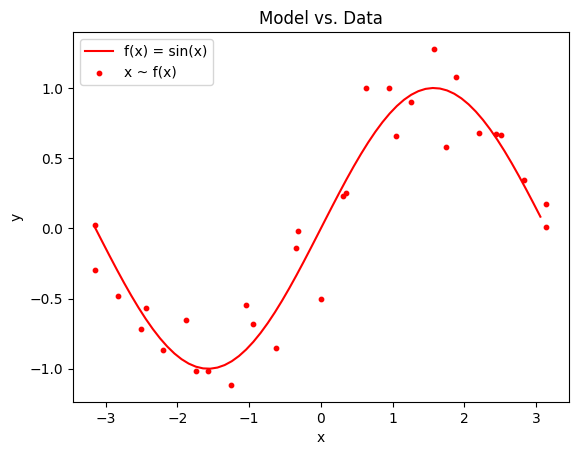

In [17]:
# 3
x = np.arange(-pi, pi, 0.1)
y = np.sin(x)
plt.plot(x, y, c = 'r')
plt.scatter(x_val, y_val, s = 10, c = 'r')
plt.scatter(x_train, y_train, s = 10, c = 'r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model vs. Data")
plt.legend(['f(x) = sin(x)', 'x ~ f(x)'])
plt.show()

In [18]:
# 4
def gen_data_matrix(x, degree):
    # initialize matrix X
    X = np.zeros((x.shape[0], degree + 1))
    
    # add feature
    for d in range(degree + 1):
        X[:, d] = x ** d
    
    return X

def fit_poly(X, y):
    
    Y = y.reshape((-1, 1))
    
    # OLS --> Aw = b  == A.T * A * w = A.T * b
    # make A.T * A matrix
    A = np.matmul(X.transpose(), X)
    
    # make A.T * b matrix
    b = np.matmul(X.transpose(), Y)
    
    weight = np.linalg.solve(A, b)
    y_pred = X @ weight
    
    return weight, y_pred



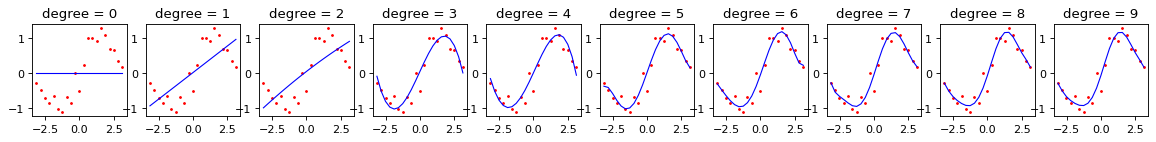

In [23]:
d_max = 10
fig, axes = plt.subplots(nrows=1, ncols=d_max, figsize=(d_max+8, 1.5), dpi=80)

mse_t = []
mse_v = []

for degree in range(d_max):
    
    
    
    X_train = gen_data_matrix(x_train, degree)
    weight, y_train_pred = fit_poly(X_train, y_train)
    
    X_val = gen_data_matrix(x_val, degree)
    y_val_pred = X_val @ weight
    
    # compute MSE
    mse_t.append(np.mean((y_train - y_train_pred.reshape(-1)) ** 2))
    mse_v.append(np.mean((y_val - y_val_pred.reshape(-1))** 2))
    
    # plot figures
    axes[degree].plot(x_train, y_train, 'r.', ms=3)
    axes[degree].plot(x_train, y_train_pred, 'b', lw=1)
    axes[degree].set_title('degree = ' + str(degree))
              

plt.show()

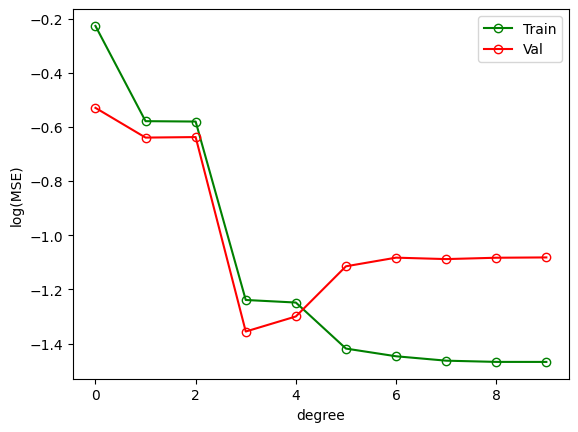

In [24]:
plt.plot(np.log10(mse_t),'go-', mfc='none', label='Train')
plt.plot(np.log10(mse_v),'ro-', mfc='none', label='Val')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.legend()
plt.show()